## 1. PROBLEM STATEMENT

## 2. Importing the Libraries

In [173]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

## 3.Loading Dataset

In [125]:
df = pd.read_csv("yummy.csv")

In [126]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [127]:
df.Like.value_counts()

3               230
2               187
0               169
4               160
1               152
I hate it!-5    152
I love it!+5    142
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [129]:
df.shape

(1453, 15)

In [130]:
df['Like']

0                 -3
1                  2
2                  1
3                  4
4                  2
            ...     
1448    I hate it!-5
1449               2
1450               3
1451               4
1452              -3
Name: Like, Length: 1453, dtype: object

In [131]:
df.isnull().any()

yummy             False
convenient        False
spicy             False
fattening         False
greasy            False
fast              False
cheap             False
tasty             False
expensive         False
healthy           False
disgusting        False
Like              False
Age               False
VisitFrequency    False
Gender            False
dtype: bool

In [132]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

from the above we can see that there are no null values

In [133]:
df.duplicated().sum()

22

In [134]:
# Identifying duplicate rows
duplicate_rows = df[df.duplicated()]

# Displaying the duplicate rows
print(duplicate_rows)

     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
404    Yes        Yes    No        No     No  Yes   Yes   Yes        No   
421    Yes        Yes    No       Yes    Yes  Yes    No   Yes       Yes   
441     No        Yes    No       Yes     No  Yes   Yes    No        No   
453    Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
598     No        Yes    No       Yes    Yes  Yes   Yes    No        No   
674    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
710    Yes        Yes    No       Yes     No  Yes   Yes   Yes        No   
725     No        Yes    No       Yes    Yes  Yes   Yes    No        No   
741    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
744    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
745    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
774    Yes        Yes    No       Yes     No  Yes   Yes   Yes        No   
799    Yes        Yes    

In [135]:
#df.drop_duplicates(inplace=True)
#df.shape

In [136]:
df.duplicated().sum()

22

## 4. CLEANING THE 'LIKE' COLUMN 

In [137]:
df['Like'] = df['Like'].replace({'I love it!\+(\d+)': r'\1', 'I hate it!\-(\d+)': r'-\1'}, regex=True)

In [138]:
df['Like'] = pd.to_numeric(df['Like'], errors='coerce', downcast='integer')

In [139]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


## 5. Encoding the variables

In [149]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender','VisitFrequency']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [150]:
mapping = dict(zip(le.classes_, range(len(le.classes_))))
mapping

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [151]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1


## EDA

## 6.UNIVARIATE ANALYSIS

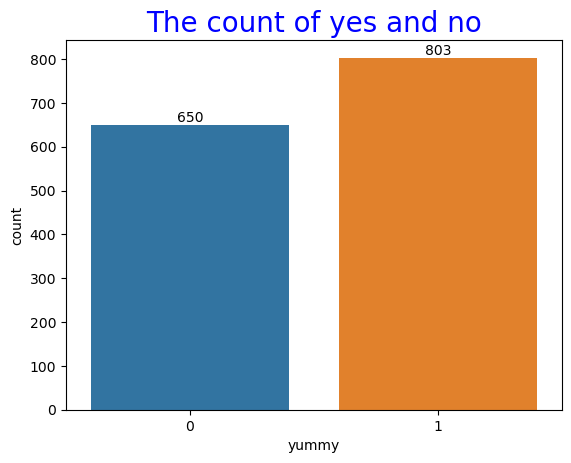

In [143]:
count=sns.countplot(x=df.yummy,data=df)
for i in count.containers:
    count.bar_label(i)
plt.title("The count of yes and no",color='b',size=20)
plt.show()

In [147]:
df['yummy'].value_counts()  # so here in the graph the '0' is no and '1' is yes

1    803
0    650
Name: yummy, dtype: int64

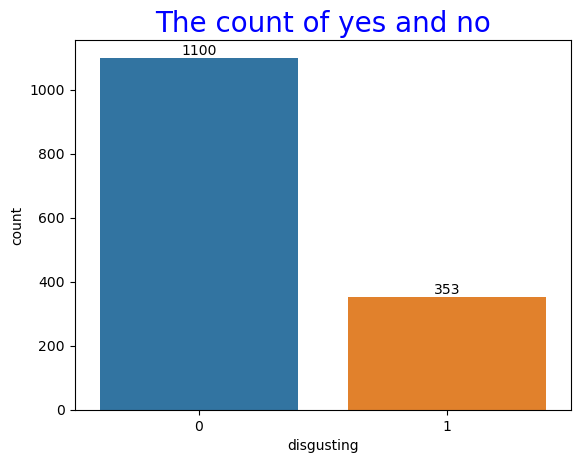

In [21]:

count=sns.countplot(x=df.disgusting,data=df)
for i in count.containers:
    count.bar_label(i)
plt.title("The count of yes and no",color='b',size=20)
plt.show()

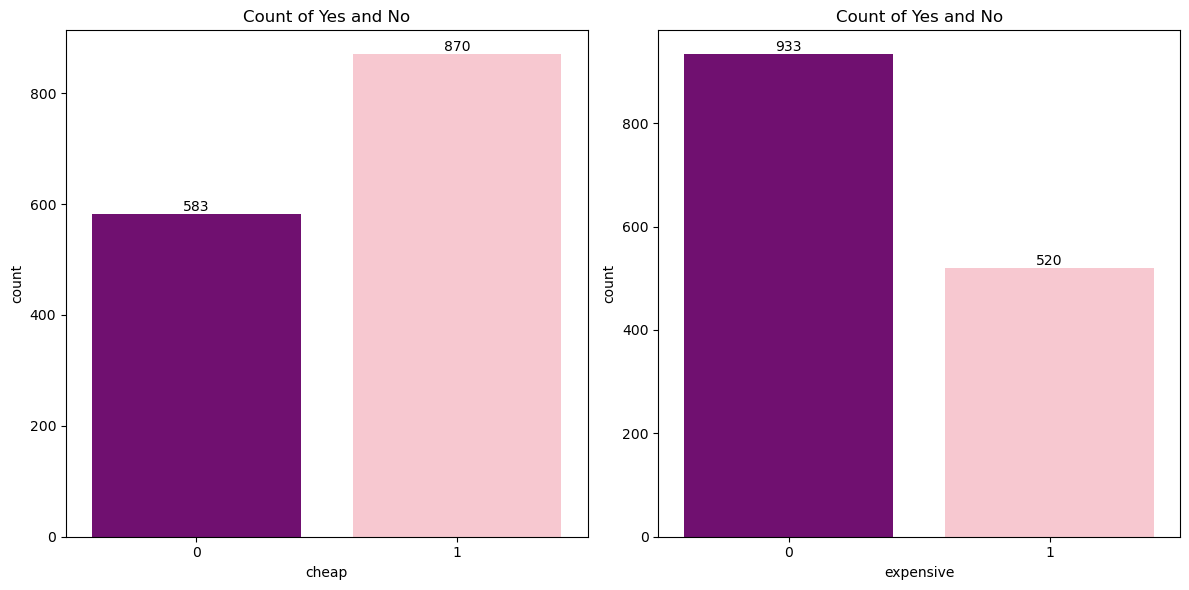

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns for two plots side by side

# Plotting countplots with count labels
for i, column in enumerate(['cheap', 'expensive']):
    count = sns.countplot(x=column, data=df, ax=axes[i],palette=['purple','pink'])
    count.bar_label(count.containers[0])  # Add count labels
    axes[i].set_title(f'Count of Yes and No')
 
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

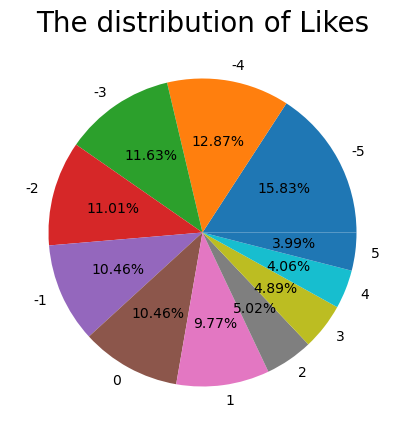

In [23]:
plt.figure(figsize=(10,5))
plt.pie(df.Like.value_counts().values,
    labels=['-5','-4','-3','-2','-1','0','1','2','3','4','5'],autopct='%1.2f%%')
plt.title("The distribution of Likes",color='black',size=20)
plt.show()


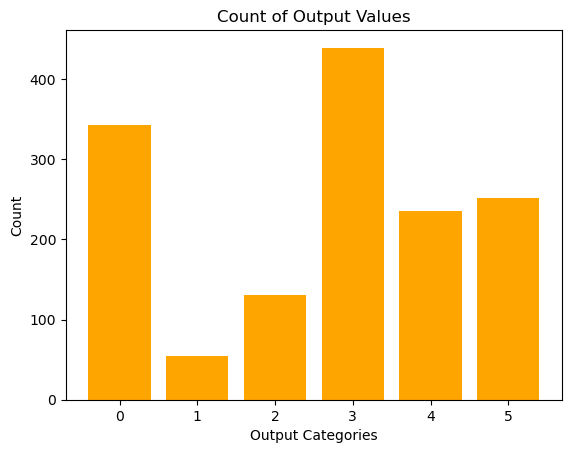

In [24]:
value_counts = df['VisitFrequency'].value_counts()
plt.bar(value_counts.index, value_counts.values,color='orange')
plt.title('Count of Output Values')
plt.xlabel('Output Categories')
plt.ylabel('Count')
plt.show()

## 7. Bivariate analysis

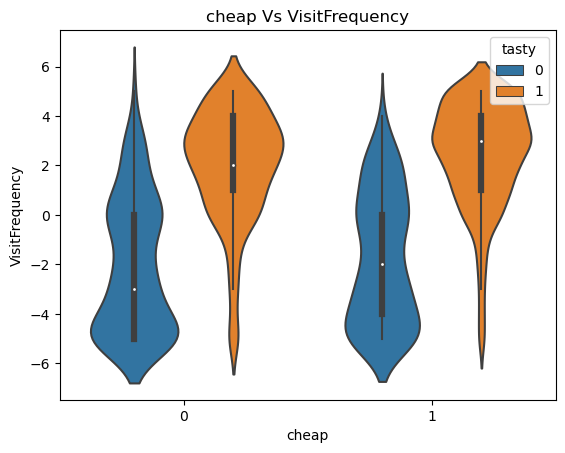

In [25]:
sns.violinplot(x='cheap', y='Like',hue='tasty',data=df)
plt.xlabel('cheap')
plt.ylabel('VisitFrequency')
plt.title('cheap Vs VisitFrequency')
plt.show()

C:\Users\kolla\AppData\Local\Temp\ipykernel_12488\3708334760.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="VisitFrequency", y="Age",data=df,  palette="Set2",orient="v", height=5, aspect=2,kind="swarm")


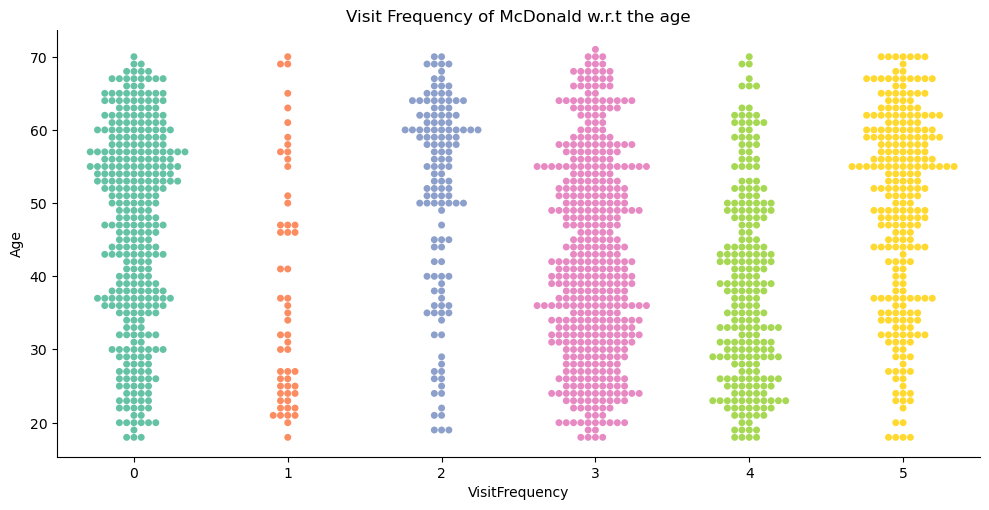

In [26]:
sns.catplot(x="VisitFrequency", y="Age",data=df,  palette="Set2",orient="v", height=5, aspect=2,kind="swarm")
plt.title('Visit Frequency of McDonald w.r.t the age')
plt.show()

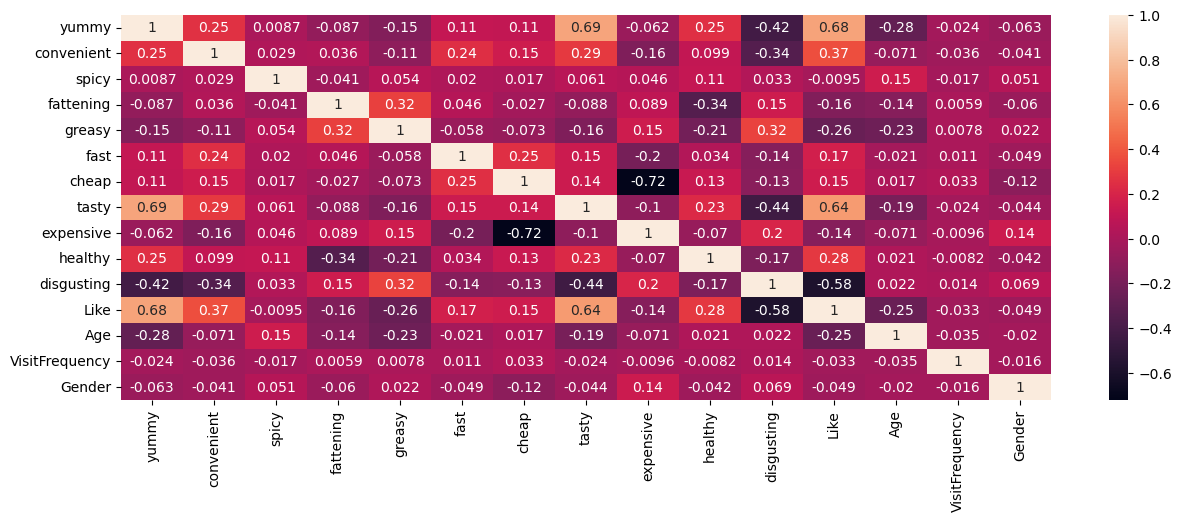

In [27]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

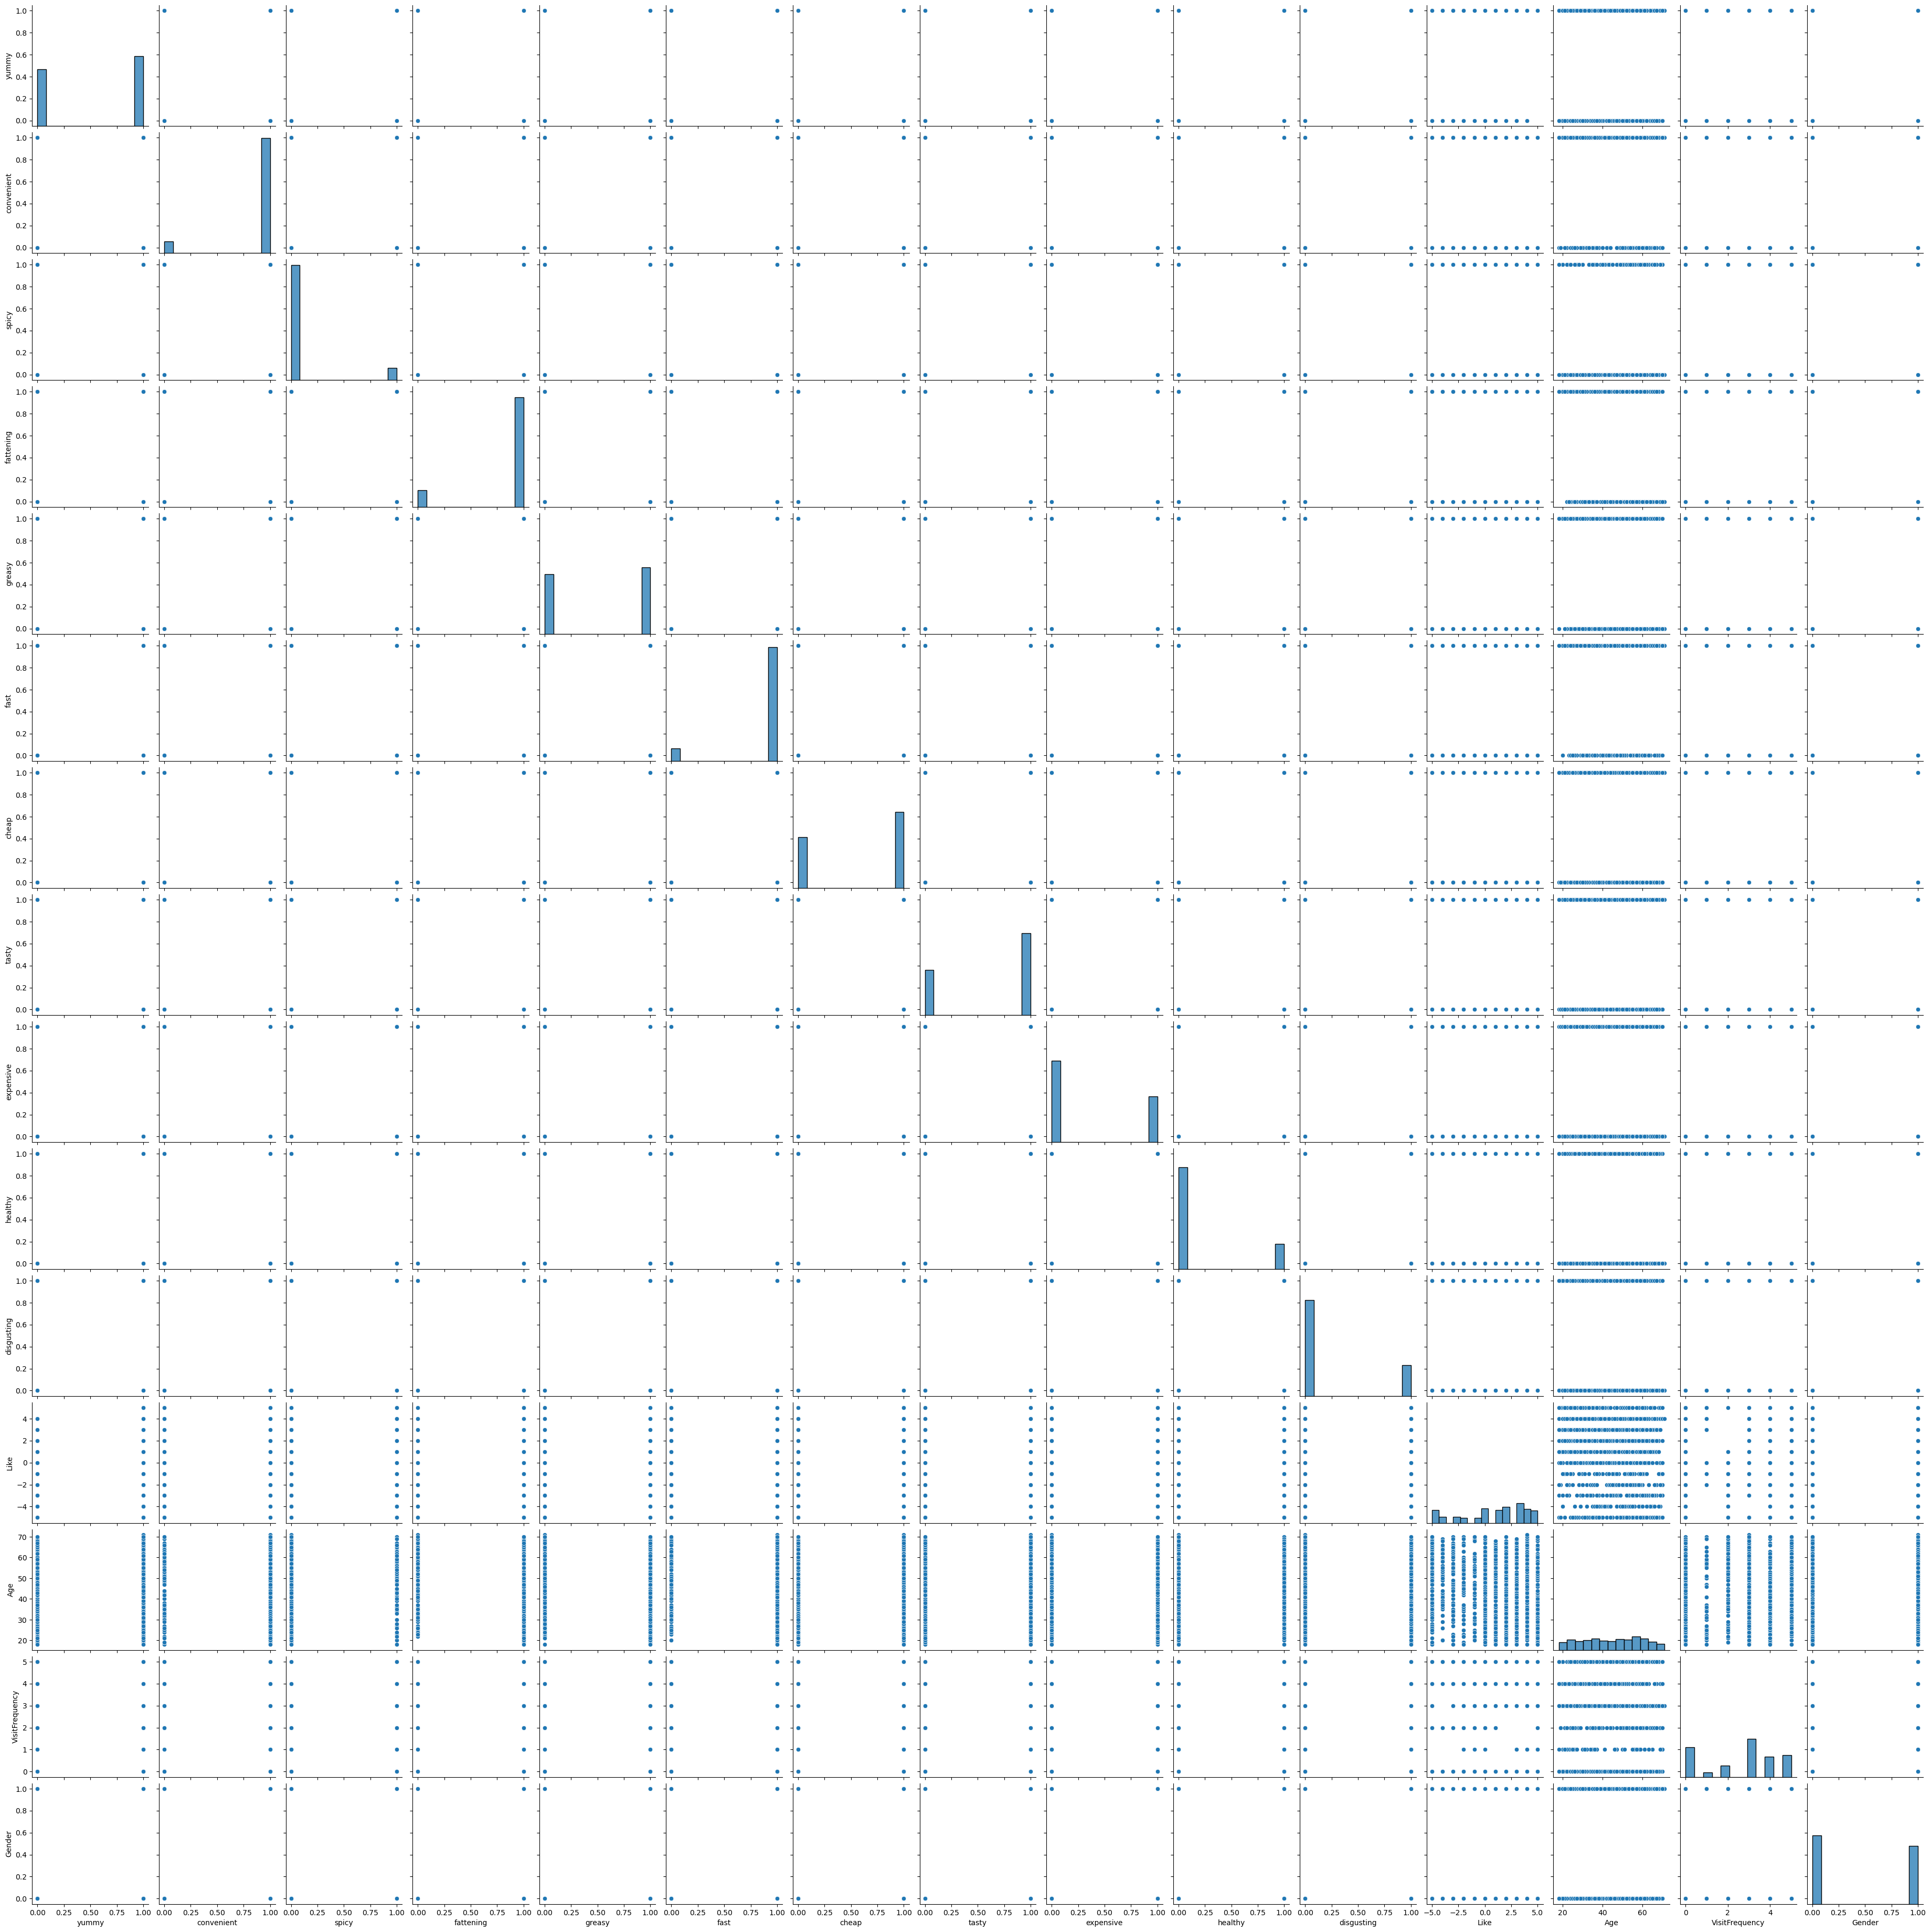

In [28]:
sns.pairplot(df)
plt.show()

## 8. descriptive analysis

In [29]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,0.775637,44.604955,2.637990,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.115417,14.221178,1.756057,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,45.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,57.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,5.000000,1.000000


In [30]:
df.skew()

yummy            -0.211995
convenient       -2.821579
spicy             2.793420
fattening        -2.165954
greasy           -0.106246
fast             -2.673256
cheap            -0.403401
tasty            -0.602948
expensive         0.593549
healthy           1.510189
disgusting        1.200012
Like             -0.539810
Age              -0.090070
VisitFrequency   -0.332942
Gender            0.170090
dtype: float64

## 9.Handling Outliers

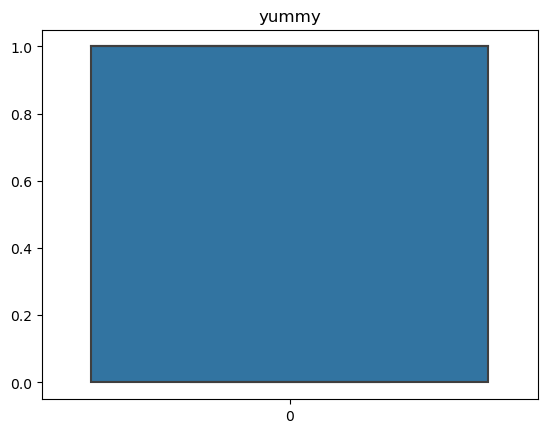

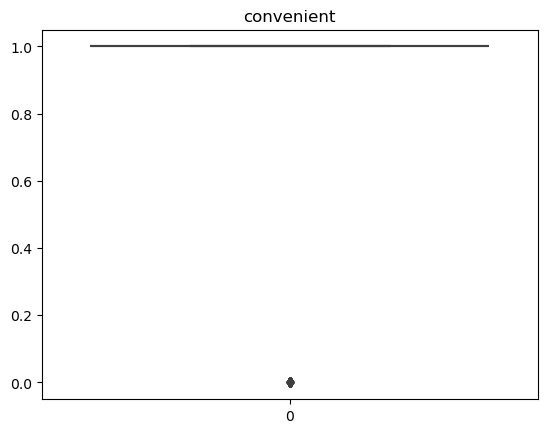

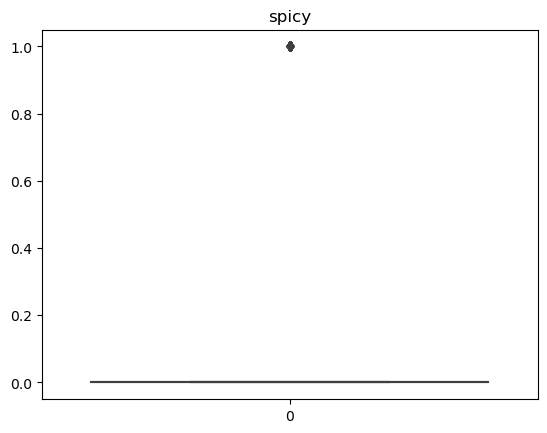

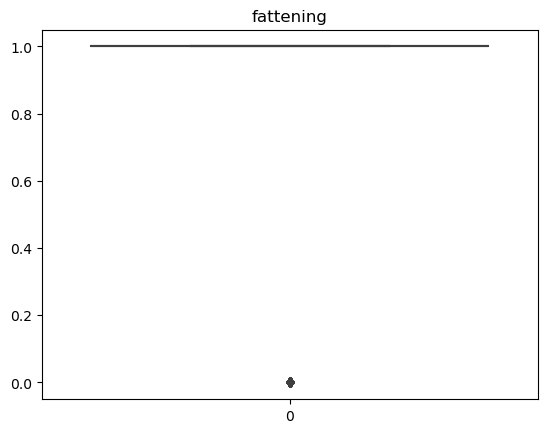

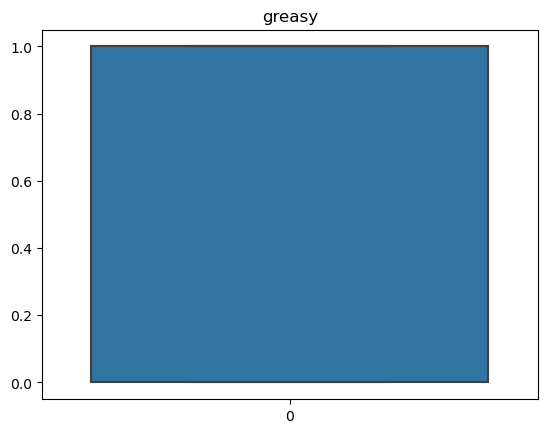

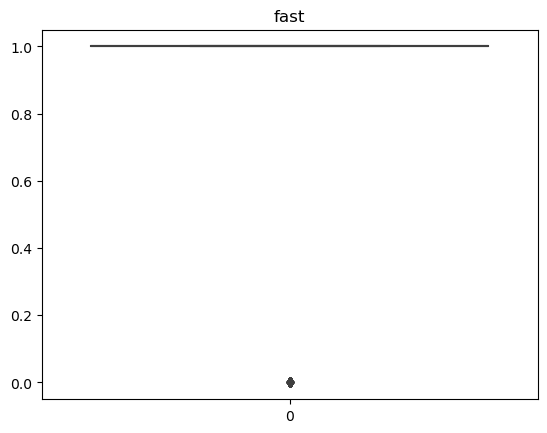

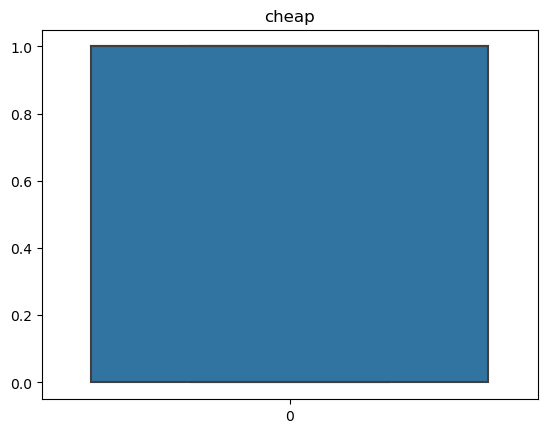

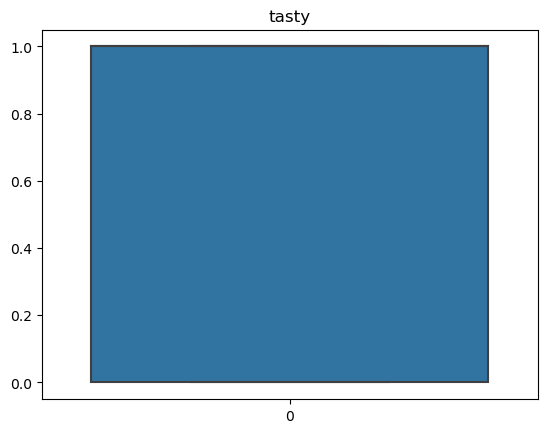

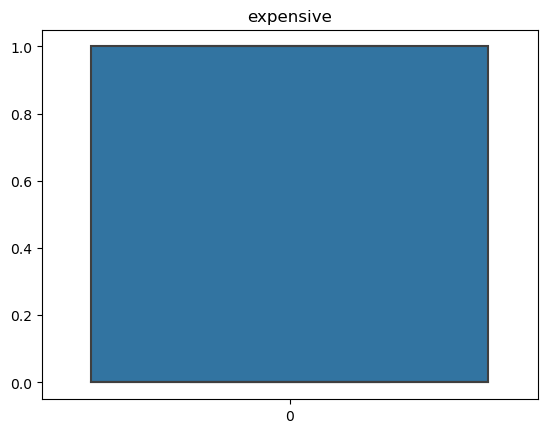

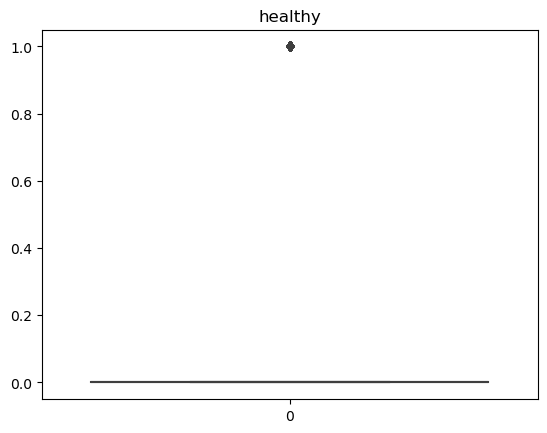

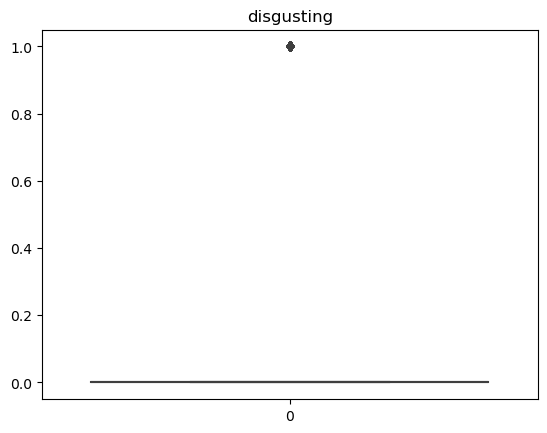

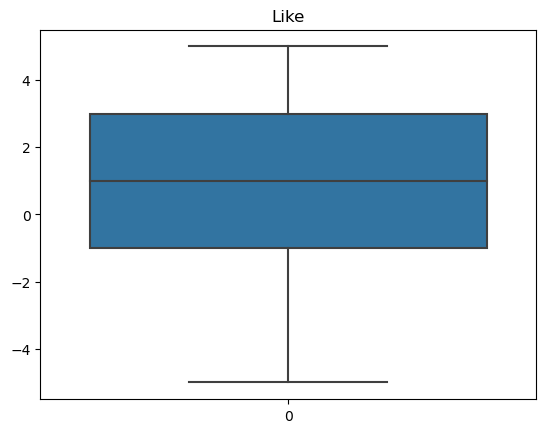

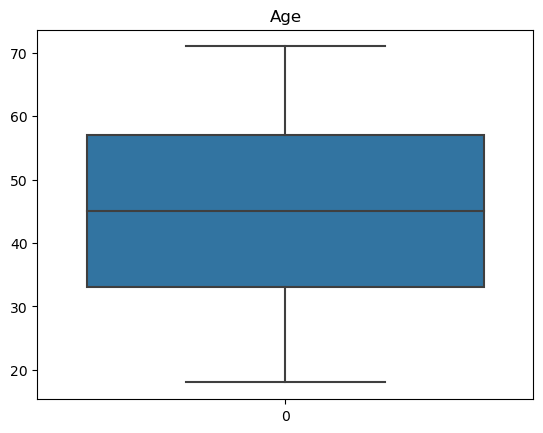

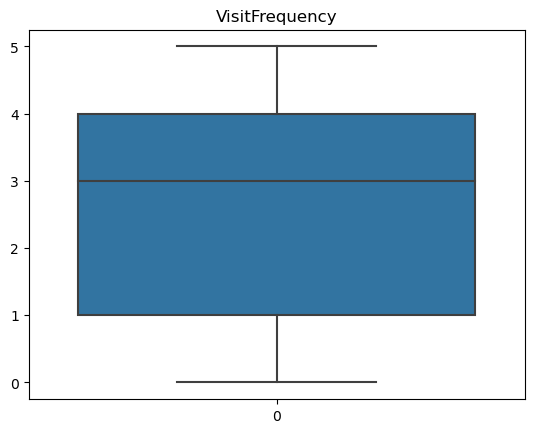

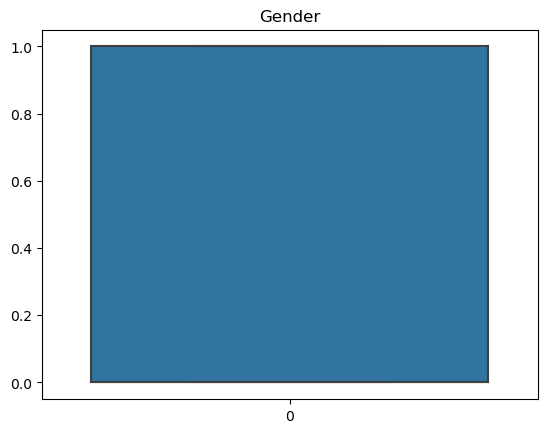

In [31]:
for i in df.columns:
    if type(df[i][0])!=str:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

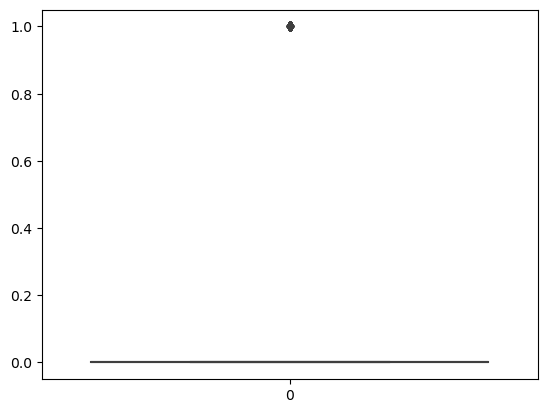

In [32]:
sns.boxplot(df['spicy'])
plt.show()


In [33]:
df.spicy.unique()

array([0, 1])

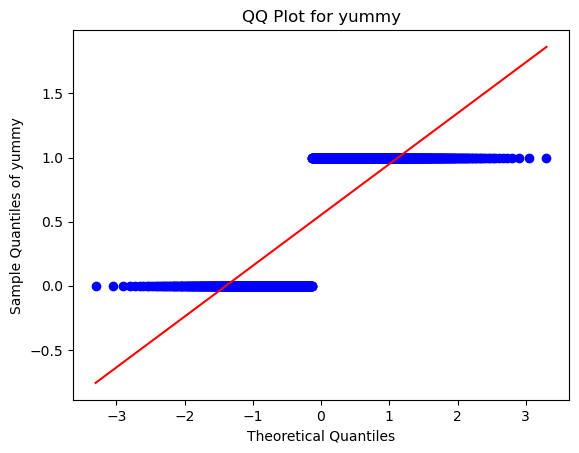

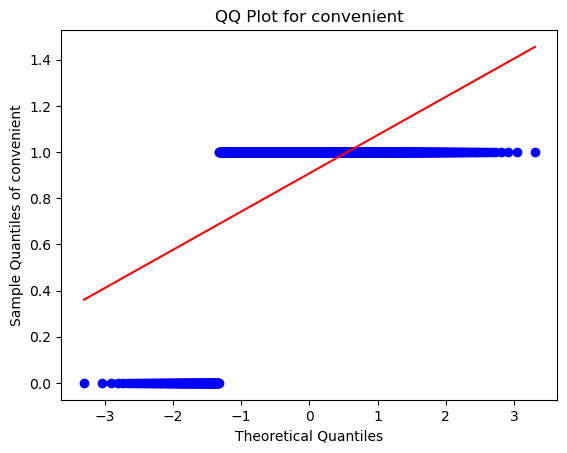

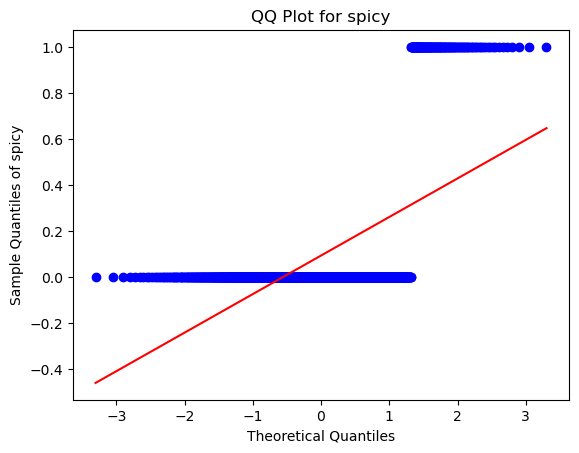

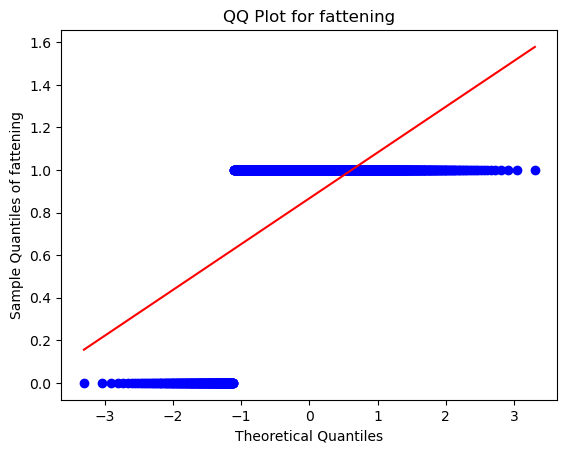

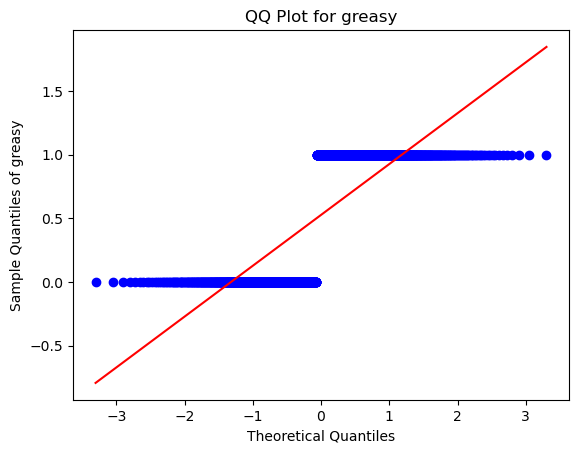

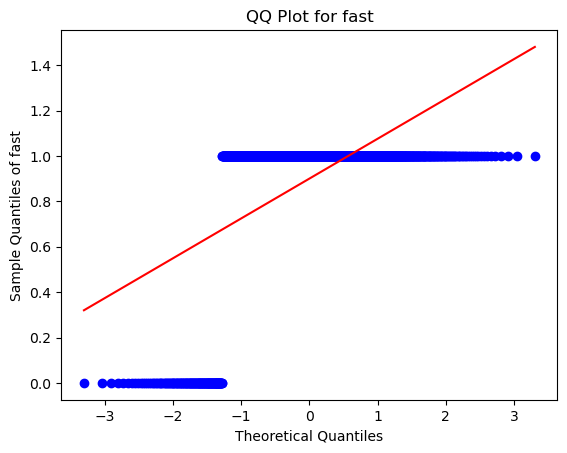

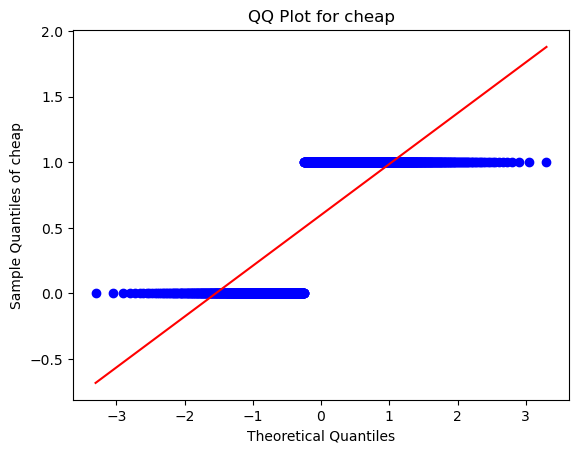

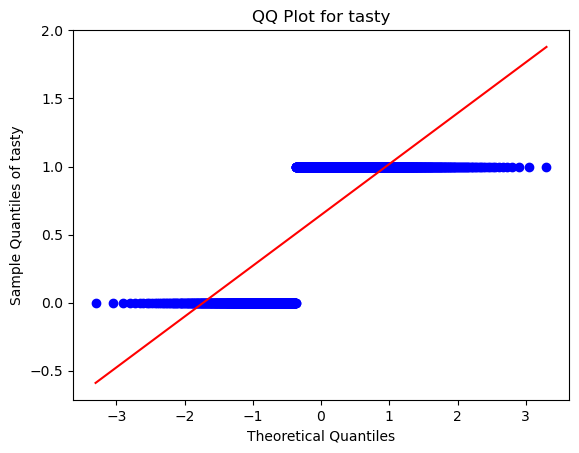

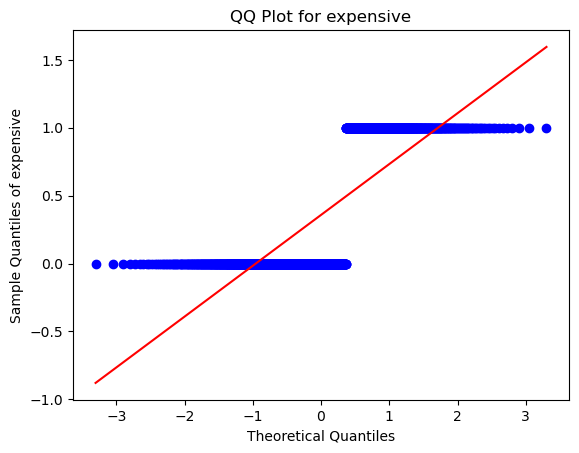

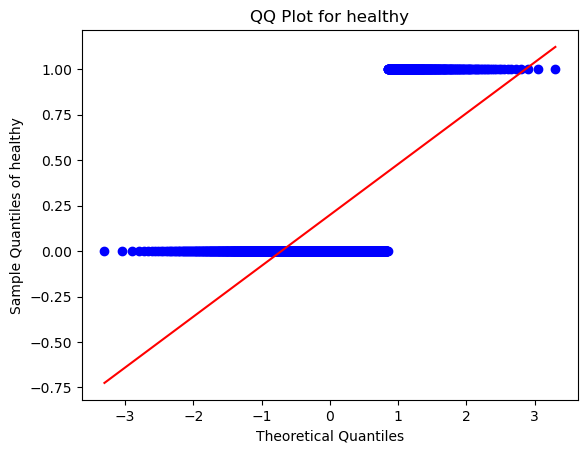

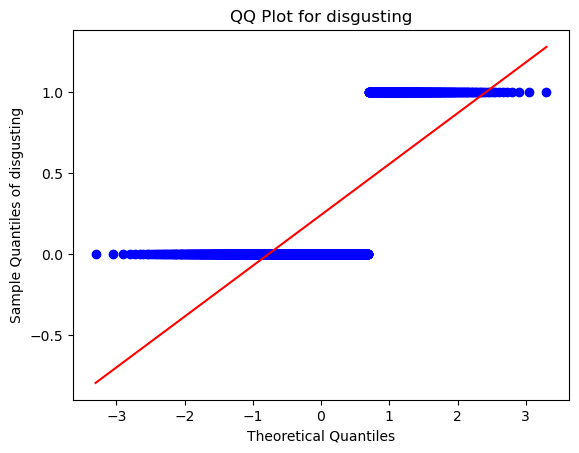

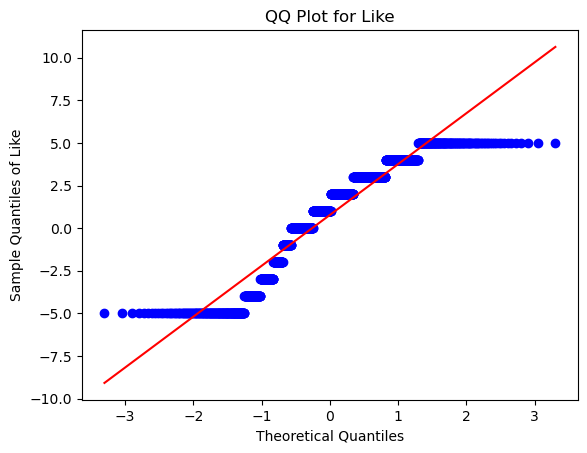

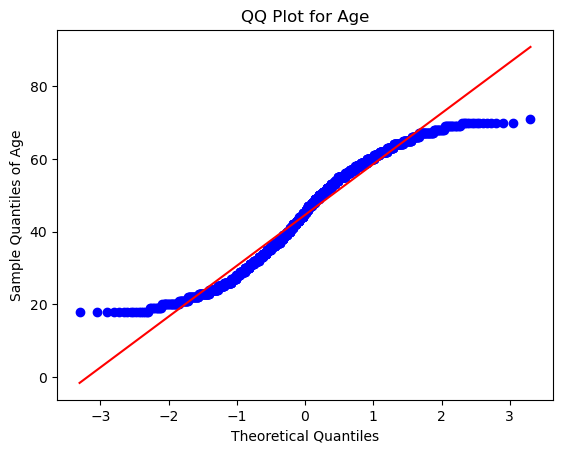

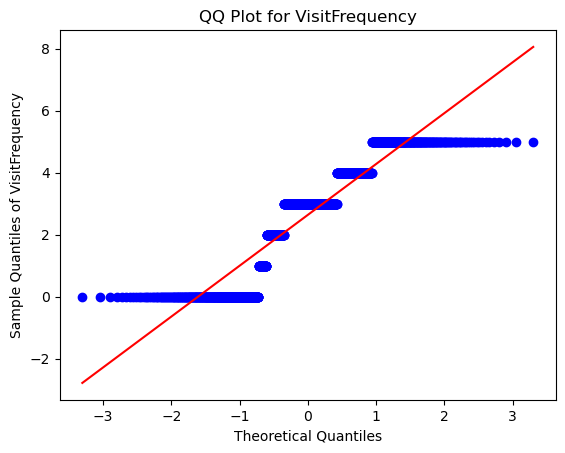

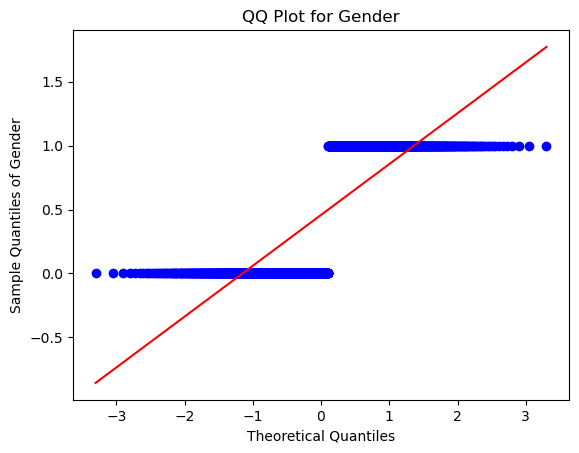

In [34]:
for col in df.columns:
    sts.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot for {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel(f"Sample Quantiles of {col}")
    plt.show()

In [35]:
#Splitting the dependent and independent variables

In [36]:
x=df.drop(['VisitFrequency'],axis=1)

In [37]:
x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,1


In [38]:
y=df['VisitFrequency']
y.head()

0    0
1    0
2    0
3    4
4    3
Name: VisitFrequency, dtype: int32

In [39]:
x.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'Gender'],
      dtype='object')

In [40]:
y.value_counts()

3    439
0    342
5    252
4    235
2    131
1     54
Name: VisitFrequency, dtype: int64

In [41]:
y.shape

(1453,)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify=y)
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [43]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)
y_train.value_counts()

3    351
0    273
5    202
4    188
2    105
1     43
Name: VisitFrequency, dtype: int64

In [44]:
y_train_smote.value_counts()

3    351
5    351
1    351
4    351
2    351
0    351
Name: VisitFrequency, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_columns=x_train_smote.columns
x_scaled=scaler.fit_transform(x_train_smote)

In [46]:
x_scaled

array([[-1.06071963,  0.40836136, -0.24472286, ...,  0.71406992,
        -1.4559641 , -0.75374468],
       [-1.06071963,  0.40836136, -0.24472286, ..., -0.18266905,
         1.75113575, -0.75374468],
       [-1.06071963,  0.40836136, -0.24472286, ...,  0.11624394,
         0.72759324,  1.32670919],
       ...,
       [-1.06071963,  0.40836136, -0.24472286, ...,  0.11624394,
         1.54642725, -0.75374468],
       [-1.06071963, -2.4488115 , -0.24472286, ..., -1.378321  ,
         1.00053791, -0.75374468],
       [-1.06071963,  0.40836136, -0.24472286, ..., -0.18266905,
         1.00053791, -0.75374468]])

## 10. handling the imbalanced data

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify=y)
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [48]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)
y_train.value_counts()

3    351
0    273
5    202
4    188
2    105
1     43
Name: VisitFrequency, dtype: int64

In [49]:
y_train_smote.value_counts()

3    351
5    351
1    351
4    351
2    351
0    351
Name: VisitFrequency, dtype: int64

In [50]:
y_train.shape

(1162,)

## 11. Splitting of data into independent and dependent variables

In [51]:
x=df.drop(['VisitFrequency'],axis=1)

In [52]:
x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,1


In [53]:
x.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'Gender'],
      dtype='object')

In [54]:
y=df['VisitFrequency']
y.head()

0    0
1    0
2    0
3    4
4    3
Name: VisitFrequency, dtype: int32

In [55]:
y.value_counts()

3    439
0    342
5    252
4    235
2    131
1     54
Name: VisitFrequency, dtype: int64

In [56]:
y.shape

(1453,)

## 12 . Scaling the variables

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_columns=x_train_smote.columns
x_scaled = scaler.fit_transform(x_train_smote)

In [163]:
x_scaled

array([[-1.04667205,  0.40519021, -0.24033293, ...,  0.72370044,
        -1.47849323, -0.76618433],
       [-1.04667205,  0.40519021, -0.24033293, ..., -0.16811531,
         1.70200395, -0.76618433],
       [-1.04667205,  0.40519021, -0.24033293, ...,  0.1291566 ,
         0.68695166,  1.30516895],
       ...,
       [-1.04667205,  0.40519021, -0.24033293, ..., -1.35720298,
        -1.81684399, -0.76618433],
       [-1.04667205,  0.40519021, -0.24033293, ..., -1.05993107,
         1.22831288, -0.76618433],
       [-1.04667205, -2.46797672, -0.24033293, ..., -1.6544749 ,
         1.49899349, -0.76618433]])

## Train,Test and Split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_train_smote,test_size = 0.2,random_state = 0,stratify=y_train_smote)

In [60]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1684, 14), (422, 14), (1684,), (422,))

In [61]:
# calculating the error value of k in the given range 

In [62]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [63]:
reg = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(x_train, x_test, y_train, y_test)
models

  3%|██▊                                                                                | 1/29 [00:00<00:11,  2.38it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')


  7%|█████▋                                                                             | 2/29 [00:00<00:08,  3.21it/s]

ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')


 28%|██████████████████████▉                                                            | 8/29 [00:01<00:02,  9.39it/s]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 34%|████████████████████████████▎                                                     | 10/29 [00:02<00:04,  4.00it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')


 41%|█████████████████████████████████▉                                                | 12/29 [00:02<00:03,  4.26it/s]

ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')


 45%|████████████████████████████████████▊                                             | 13/29 [00:03<00:04,  3.88it/s]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 55%|█████████████████████████████████████████████▏                                    | 16/29 [00:04<00:03,  3.44it/s]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')


 59%|████████████████████████████████████████████████                                  | 17/29 [00:04<00:03,  3.36it/s]

ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')


 69%|████████████████████████████████████████████████████████▌                         | 20/29 [00:05<00:02,  3.85it/s]

ROC AUC couldn't be calculated for NuSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 76%|██████████████████████████████████████████████████████████████▏                   | 22/29 [00:06<00:02,  2.67it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')


 86%|██████████████████████████████████████████████████████████████████████▋           | 25/29 [00:06<00:00,  4.08it/s]

ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')


 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:07<00:00,  3.35it/s]

ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:08<00:00,  2.83it/s]

ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.07it/s]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.62,0.62,None,0.62,0.23
LGBMClassifier,0.62,0.62,None,0.62,1.29
XGBClassifier,0.60,0.60,None,0.59,0.93
RandomForestClassifier,0.59,0.59,None,0.59,1.10
ExtraTreesClassifier,0.58,0.58,None,0.57,1.08
LabelPropagation,0.57,0.57,None,0.56,0.29
LabelSpreading,0.56,0.56,None,0.55,0.36
DecisionTreeClassifier,0.55,0.55,None,0.55,0.05
ExtraTreeClassifier,0.53,0.53,None,0.52,0.03


In [64]:
from lazypredict.Supervised import LazyClassifier

In [169]:
print(x_scaled[:5])  # This will display the first five rows

[[-1.04667205  0.40519021 -0.24033293  0.44185143 -0.94725778  0.39961435
   0.98398389 -1.22401824 -0.64740827 -0.41702883 -0.53892595  0.72370044
  -1.47849323 -0.76618433]
 [-1.04667205  0.40519021 -0.24033293  0.44185143  1.05567885  0.39961435
   0.98398389 -1.22401824 -0.64740827 -0.41702883 -0.53892595 -0.16811531
   1.70200395 -0.76618433]
 [-1.04667205  0.40519021 -0.24033293  0.44185143 -0.94725778  0.39961435
   0.98398389  0.81698129 -0.64740827 -0.41702883 -0.53892595  0.1291566
   0.68695166  1.30516895]
 [ 0.9554091   0.40519021 -0.24033293  0.44185143  1.05567885  0.39961435
  -1.0162768   0.81698129  1.54462037 -0.41702883 -0.53892595  1.31824427
  -1.54616338  1.30516895]
 [-1.04667205  0.40519021 -0.24033293  0.44185143 -0.94725778  0.39961435
  -1.0162768  -1.22401824  1.54462037 -0.41702883  1.8555425  -1.6544749
   0.75462181  1.30516895]]


In [66]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.12it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.62,0.62,None,0.62,0.26
LGBMClassifier,0.62,0.62,None,0.62,1.10
XGBClassifier,0.60,0.60,None,0.59,0.77
RandomForestClassifier,0.59,0.59,None,0.59,1.17
ExtraTreesClassifier,0.58,0.58,None,0.57,1.19
LabelPropagation,0.57,0.57,None,0.56,0.33
LabelSpreading,0.56,0.56,None,0.55,0.39
DecisionTreeClassifier,0.55,0.55,None,0.55,0.05
ExtraTreeClassifier,0.53,0.53,None,0.52,0.06


## Decision Tree Classifier

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
clf = DecisionTreeClassifier(random_state=42)
#Fit the classifier to your data
decision=dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
training_accuracy=decision.score(x_train,y_train)
testing_accuracy=decision.score(x_test,y_test)
print("*** Decision Tree ***")
print("Training Accuracy : ",training_accuracy)
print("Testing Accuracy : ",testing_accuracy)
print("Accuracy Score : ",accuracy_score(y_test,pred)*100)
print("** Confusion Matrix **")
print(confusion_matrix(y_test,pred))
print("** Classification Report **")
print(classification_report(y_test,pred))

*** Decision Tree ***
Training Accuracy :  0.9774346793349169
Testing Accuracy :  0.5734597156398105
Accuracy Score :  57.345971563981045
** Confusion Matrix **
[[35  3  3 13  2 15]
 [ 5 57  0  5  3  0]
 [ 4  0 58  2  0  6]
 [16  5  0 19 20 10]
 [ 4  9  2 19 33  4]
 [10  1 10  7  2 40]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.47      0.49      0.48        71
           1       0.76      0.81      0.79        70
           2       0.79      0.83      0.81        70
           3       0.29      0.27      0.28        70
           4       0.55      0.46      0.50        71
           5       0.53      0.57      0.55        70

    accuracy                           0.57       422
   macro avg       0.57      0.57      0.57       422
weighted avg       0.57      0.57      0.57       422



In [69]:
ac=accuracy_score(y_test,pred)*100
ac

57.345971563981045

In [70]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,0,1


## KNN algorithm 

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
error=[]
for i in range (1,100):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i=model.predict(x_test)
    error.append(np.mean(pred_i !=y_test))
    

Text(0, 0.5, 'mean error')

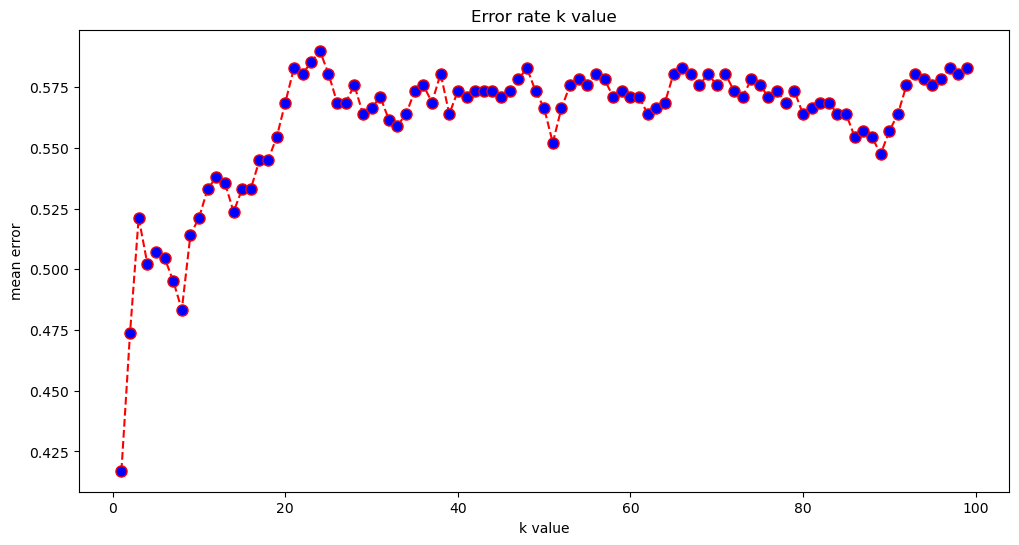

In [73]:
plt.figure(figsize=(12,6))
plt.plot(range(1,100),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=8)
plt.title('Error rate k value')
plt.xlabel('k value')
plt.ylabel('mean error')

In [74]:
# so the lowest error can be seen at k = 1

In [75]:
#prediction of all the test data

In [76]:
y_pred = model.predict(x_test)
pred=model.predict(x_train)
y_pred_reshaped = y_pred.reshape(len(y_pred), 1)
y_test_reshaped = y_test.values.reshape(len(y_test), 1)  # Convert Series to NumPy array using .values

# Concatenate and print the predictions and actual values
print(np.concatenate((y_pred_reshaped, y_test_reshaped), axis=1))
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[3 0]
 [3 3]
 [4 1]
 [1 0]
 [5 0]
 [3 0]
 [2 2]
 [1 3]
 [3 4]
 [1 1]
 [3 0]
 [1 4]
 [1 1]
 [2 2]
 [5 3]
 [2 3]
 [4 5]
 [0 0]
 [3 3]
 [4 3]
 [1 0]
 [4 4]
 [3 1]
 [1 1]
 [1 3]
 [3 4]
 [4 4]
 [0 3]
 [2 5]
 [1 4]
 [3 1]
 [0 0]
 [2 0]
 [4 1]
 [2 0]
 [2 5]
 [5 0]
 [5 4]
 [2 2]
 [5 2]
 [3 0]
 [0 4]
 [2 5]
 [3 3]
 [2 5]
 [0 3]
 [0 0]
 [2 2]
 [3 4]
 [1 1]
 [3 3]
 [2 2]
 [4 0]
 [5 4]
 [1 1]
 [1 1]
 [2 4]
 [3 1]
 [5 0]
 [5 4]
 [3 3]
 [1 5]
 [3 4]
 [4 4]
 [0 0]
 [1 1]
 [5 5]
 [1 4]
 [4 3]
 [3 1]
 [0 0]
 [5 5]
 [1 1]
 [2 2]
 [5 2]
 [2 2]
 [1 1]
 [5 2]
 [0 3]
 [0 2]
 [4 3]
 [1 4]
 [4 4]
 [1 4]
 [4 3]
 [0 3]
 [1 1]
 [1 1]
 [3 0]
 [3 1]
 [3 3]
 [1 1]
 [3 1]
 [1 1]
 [5 5]
 [4 4]
 [5 5]
 [1 1]
 [1 5]
 [4 3]
 [2 5]
 [2 2]
 [2 2]
 [5 3]
 [5 5]
 [3 3]
 [1 1]
 [1 4]
 [2 2]
 [4 5]
 [3 3]
 [1 0]
 [1 1]
 [1 1]
 [3 3]
 [1 1]
 [2 0]
 [3 4]
 [4 1]
 [5 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 4]
 [5 2]
 [2 2]
 [1 5]
 [4 0]
 [2 2]
 [2 2]
 [0 5]
 [3 4]
 [1 1]
 [2 2]
 [3 4]
 [2 2]
 [1 4]
 [2 2]
 [1 1]
 [0 3]
 [3 3]
 [3 3]

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [78]:

    knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski',p=2)
    model=knn.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    #pred=model.predict(x_train)
    print("*** KNN ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, y_pred))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,y_pred))
    print("** Classification Report **")
    print(classification_report(y_train, pred))
    print(classification_report(y_test,y_pred))

*** KNN ***
Training Accuracy :  0.9774346793349169
Testing Accuracy :  0.5734597156398105
Accuracy Score :  0.5829383886255924
** Confusion Matrix **
[[31  5  6  5  8 16]
 [ 2 58  0  3  6  1]
 [ 6  1 57  2  0  4]
 [19  6  3 21 15  6]
 [ 3  4  3 18 39  4]
 [10  0 13  5  2 40]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.42      0.18      0.25       280
           1       0.46      0.84      0.60       281
           2       0.57      0.79      0.66       281
           3       0.33      0.29      0.31       281
           4       0.39      0.25      0.30       280
           5       0.41      0.35      0.38       281

    accuracy                           0.45      1684
   macro avg       0.43      0.45      0.42      1684
weighted avg       0.43      0.45      0.42      1684

              precision    recall  f1-score   support

           0       0.44      0.44      0.44        71
           1       0.78      0.83      0.8

## Logistic Regresion

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
def Logistic(x_train,x_test,y_train,y_test):
    lgr=LogisticRegression()
    logistic=lgr.fit(x_train,y_train)
    predict_logistic=logistic.predict(x_test)
    training_accuracy=logistic.score(x_train,y_train)
    testing_accuracy=logistic.score(x_test,y_test)
    print("*** Logistic Regression ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test,predict_logistic))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,predict_logistic))
    print("** Classification Report **")
    print(classification_report(y_test,predict_logistic))

In [81]:
Logistic(x_train,x_test,y_train,y_test)

*** Logistic Regression ***
Training Accuracy :  0.5118764845605701
Testing Accuracy :  0.43364928909952605
Accuracy Score :  0.43364928909952605
** Confusion Matrix **
[[19  8  7 16  4 17]
 [ 2 40  0 18 10  0]
 [ 5  0 57  2  0  6]
 [10 11  3 20 24  2]
 [ 5 24  0 12 25  5]
 [13  2 27  3  3 22]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.35      0.27      0.30        71
           1       0.47      0.57      0.52        70
           2       0.61      0.81      0.70        70
           3       0.28      0.29      0.28        70
           4       0.38      0.35      0.36        71
           5       0.42      0.31      0.36        70

    accuracy                           0.43       422
   macro avg       0.42      0.43      0.42       422
weighted avg       0.42      0.43      0.42       422



## RANDOM FOREST CLASSIFIER 

In [82]:
from sklearn.ensemble import RandomForestClassifier
rdf=RandomForestClassifier()

In [83]:
def Random_Forest(x_train,x_test,y_train,y_test):
    rdf=RandomForestClassifier(n_estimators = 300,random_state = 42,n_jobs=-1, min_samples_leaf = 1,min_samples_split= 5)
    random=rdf.fit(x_train,y_train)
    predict_random=random.predict(x_test)
    predict_model=random.predict(x_train)
    training_accuracy=random.score(x_train,y_train)
    testing_accuracy=random.score(x_test,y_test)
    print("*** Random Forest ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, predict_random))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_random))
    print("** Classification Report **")
    print(classification_report(y_train, predict_model))
    print(classification_report(y_test, predict_random))

In [84]:
Random_Forest(x_train,x_test,y_train,y_test)

*** Random Forest ***
Training Accuracy :  0.9263657957244655
Testing Accuracy :  0.5971563981042654
Accuracy Score :  0.5971563981042654
** Confusion Matrix **
[[32  2  5 17  3 12]
 [ 2 59  0  2  7  0]
 [ 4  0 60  1  0  5]
 [17  6  1 22 19  5]
 [ 3  7  1 16 38  6]
 [ 9  0 15  4  1 41]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       280
           1       0.94      0.98      0.96       281
           2       0.94      0.99      0.97       281
           3       0.92      0.86      0.89       281
           4       0.92      0.93      0.92       280
           5       0.93      0.94      0.94       281

    accuracy                           0.93      1684
   macro avg       0.93      0.93      0.93      1684
weighted avg       0.93      0.93      0.93      1684

              precision    recall  f1-score   support

           0       0.48      0.45      0.46        71
           1       0.80      0.8

## Callibrated Classifier CV

In [85]:
from sklearn.calibration import CalibratedClassifierCV

In [86]:
base_classifier = LogisticRegression(max_iter=1000)

# Creating the CalibratedClassifierCV object using sigmoid calibration method
calibrated_classifier = CalibratedClassifierCV(base_classifier, method='sigmoid', cv=3)

# Training the CalibratedClassifierCV
calibrated_classifier.fit(x_train, y_train)

CalibratedClassifierCV(cv=3, estimator=LogisticRegression(max_iter=1000))

In [87]:
predicted_classes = calibrated_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy: {accuracy}")


Accuracy: 0.43601895734597157


In [88]:
print("*** Calibrated Classifier CV ***")
print("Training Accuracy : ",training_accuracy)
print("Testing Accuracy : ",testing_accuracy)
print("Accuracy Score : ",accuracy_score(y_test, predicted_classes ))
print("** Confusion Matrix **")
print(confusion_matrix(y_test, predicted_classes ))
print("** Classification Report **")
print(classification_report(y_test,predicted_classes ))

*** Calibrated Classifier CV ***
Training Accuracy :  0.9774346793349169
Testing Accuracy :  0.5734597156398105
Accuracy Score :  0.43601895734597157
** Confusion Matrix **
[[18 11  7 16  5 14]
 [ 2 50  0 12  6  0]
 [ 2  0 61  4  0  3]
 [ 5 20  3 18 21  3]
 [ 5 32  0 12 17  5]
 [ 9  2 31  3  5 20]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.44      0.25      0.32        71
           1       0.43      0.71      0.54        70
           2       0.60      0.87      0.71        70
           3       0.28      0.26      0.27        70
           4       0.31      0.24      0.27        71
           5       0.44      0.29      0.35        70

    accuracy                           0.44       422
   macro avg       0.42      0.44      0.41       422
weighted avg       0.42      0.44      0.41       422



## Cross Validation 

In [89]:
from sklearn.model_selection import cross_val_score
cv_values = [3, 5, 7, 10, 12, 15] 
cv_scores = {}
# Iterate over cv values and evaluate model performance
for cv in cv_values:
    knn = KNeighborsClassifier(n_neighbors=1)  # Set desired hyperparameters
    scores = cross_val_score(knn, x_scaled, y_train_smote, cv=cv)
    cv_scores[cv] = scores.mean()

# Print mean scores for each cv value
for cv, mean_score in cv_scores.items():
    print(f"CV: {cv}, Mean Accuracy: {mean_score}")
    
# Select the best cv value based on the scores
best_cv = max(cv_scores, key=cv_scores.get)
print(f"\nBest CV value: {best_cv} with mean accuracy: {cv_scores[best_cv]}")

CV: 3, Mean Accuracy: 0.5474833808167141
CV: 5, Mean Accuracy: 0.5551192714255159
CV: 7, Mean Accuracy: 0.5551131150134472
CV: 10, Mean Accuracy: 0.5547596479350034
CV: 12, Mean Accuracy: 0.5562391774891774
CV: 15, Mean Accuracy: 0.5567477203647417

Best CV value: 15 with mean accuracy: 0.5567477203647417


## Hyper Tuning

In [90]:
# Define the parameter grid to search through
param_grid = {
    'n_neighbors': [1,2,3, 5, 7, 9,20,22,36,40,54,65,70],  # values of K to try
    'weights': ['uniform', 'distance'],  # weight options
    'metric': ['euclidean', 'manhattan','minoskwi']  # distance metrics
}
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn = KNeighborsClassifier()
# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=15, scoring='accuracy')
grid_search.fit(x_train, y_train)
# Print the best parameters found
print("Best parameters:", grid_search.best_params_)
# Get the best model
best_knn = grid_search.best_estimator_
# Evaluate the model on the test set
test_accuracy = best_knn.score(x_test, y_test)
print("Test set accuracy:", test_accuracy)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Test set accuracy: 0.542654028436019


In [92]:
def KNN_model(x_train,x_test,y_train,y_test):
    knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
    model=knn.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("*** KNN ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, y_pred))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,y_pred))
    print("** Classification Report **")
    print(classification_report(y_test,y_pred))

In [93]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Define the parameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at each leaf node
}
# Initialize GridSearchCV with the classifier, parameter grid, and scoring metric
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)
# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_
# Get the best estimator (model) from the grid search
best_rf_model = grid_search.best_estimator_
# Evaluate the best model on test data
test_accuracy = best_rf_model.score(x_test, y_test)
print("Test Accuracy of Best Model:", test_accuracy)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Test Accuracy of Best Model: 0.590047393364929
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.5991698459799351


## XGBoost Classifier

In [160]:
import xgboost as xgb
def xgboost(x_train,x_test,y_train,y_test):
    xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=5)  # Assuming 5 classes for the target variable

# Training the classifier
    xgb_classifier.fit(x_train, y_train)

# Making predictions on the test set
    y_pred = xgb_classifier.predict(x_test)

# Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("*** XGBoost  ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, y_pred))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,y_pred))
    print("** Classification Report **")
    print(classification_report(y_test,y_pred))

## Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(random_state=56)
extra_trees.fit(x_train, y_train)
predictions = extra_trees.predict(x_test)
accuracy = extra_trees.score(x_test, y_test)
print("*** ExtraTree Classifier***")
print("Training Accuracy : ",training_accuracy)
print("Testing Accuracy : ",testing_accuracy)
print("Accuracy Score : ",accuracy_score(y_test, predictions))
print("** Confusion Matrix **")
print(confusion_matrix(y_test,predictions))
print("** Classification Report **")
print(classification_report(y_test,predictions)) 

## Comparison of the Accuracy of the different models

In [161]:
def comparison(x_train,x_test,y_train,y_test):
    
    KNN_model(x_train,x_test,y_train,y_test)
    print('-'*100)
    Logistic(x_train,x_test,y_train,y_test)
    print('-'*100)
    Random_Forest(x_train,x_test,y_train,y_test)
    print('-'*100)
    xgboost(x_train,x_test,y_train,y_test)
    print('-'*100)

In [162]:
comparison(x_train,x_test,y_train,y_test)

*** KNN ***
Training Accuracy :  0.9263657957244655
Testing Accuracy :  0.5971563981042654
Accuracy Score :  0.5829383886255924
** Confusion Matrix **
[[31  5  6  5  8 16]
 [ 2 58  0  3  6  1]
 [ 6  1 57  2  0  4]
 [19  6  3 21 15  6]
 [ 3  4  3 18 39  4]
 [10  0 13  5  2 40]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        71
           1       0.78      0.83      0.81        70
           2       0.70      0.81      0.75        70
           3       0.39      0.30      0.34        70
           4       0.56      0.55      0.55        71
           5       0.56      0.57      0.57        70

    accuracy                           0.58       422
   macro avg       0.57      0.58      0.58       422
weighted avg       0.57      0.58      0.57       422

----------------------------------------------------------------------------------------------------
*** Logistic Regression ***
Training Accuracy :  0

## Testing of the model

In [170]:
random.predict([[-1.04667205,0.40519021 ,-0.24033293 , 0.44185143, -0.94725778,  0.39961435,
   0.98398389, -1.22401824, -0.64740827, -0.41702883, -0.53892595,  0.72370044,
  -1.47849323 ,-0.76618433]])

array([3])

## Saving the model

In [ ]:
#from joblib import dump #Save the model to a file
#model_file = 'market.pkl'  # Name of the file to save the model
#dump(model, model_file)

In [ ]:
#import pickle
#with open(r'C:\Users\kolla\OneDrive\Desktop\jupiter python\market.pkl', 'wb') as file:
   # pickle.dump(model, file)

In [113]:
rdf=RandomForestClassifier(n_estimators = 300,random_state = 42,n_jobs=-1, min_samples_leaf = 1,min_samples_split= 5)
random=rdf.fit(x_train,y_train)
predict_random=random.predict(x_test)
predict_model=random.predict(x_train)
training_accuracy=random.score(x_train,y_train)
testing_accuracy=random.score(x_test,y_test)
print("*** Random Forest ***")
print("Training Accuracy : ",training_accuracy)
print("Testing Accuracy : ",testing_accuracy)
print("Accuracy Score : ",accuracy_score(y_test, predict_random))
print("** Confusion Matrix **")
print(confusion_matrix(y_test, predict_random))
print("** Classification Report **")
print(classification_report(y_train, predict_model))
print(classification_report(y_test, predict_random))

*** Random Forest ***
Training Accuracy :  0.9263657957244655
Testing Accuracy :  0.5971563981042654
Accuracy Score :  0.5971563981042654
** Confusion Matrix **
[[32  2  5 17  3 12]
 [ 2 59  0  2  7  0]
 [ 4  0 60  1  0  5]
 [17  6  1 22 19  5]
 [ 3  7  1 16 38  6]
 [ 9  0 15  4  1 41]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       280
           1       0.94      0.98      0.96       281
           2       0.94      0.99      0.97       281
           3       0.92      0.86      0.89       281
           4       0.92      0.93      0.92       280
           5       0.93      0.94      0.94       281

    accuracy                           0.93      1684
   macro avg       0.93      0.93      0.93      1684
weighted avg       0.93      0.93      0.93      1684

              precision    recall  f1-score   support

           0       0.48      0.45      0.46        71
           1       0.80      0.8

In [175]:
import pickle
with open('random.pkl', 'wb') as file:
    pickle.dump(random, file)